In [1]:
# import all relevant libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import pathlib
import glob

import wfdb

from fastai.tabular.all import *
from tsai.all import *
import torch

# assign the correct path to downloaded data and filenames
# realpath is this script path, while data is subfolder in the same dir
# parent_dir =  os.path.dirname(os.path.realpath(__file__))

parent_dir = pathlib.Path(os.path.abspath('')).parents[0]
data_dir = os.path.join(parent_dir, 'data\\')
raw_dir = os.path.join(parent_dir, 'data\\raw\\')
processed_dir = os.path.join(parent_dir, 'data\\processed\\')


filenames = []

for i in range(10):
    filenames.append('infant'+str(i+1))

# print and list all relevant filenames, as a quick check
print(parent_dir)
print(data_dir)
print(processed_dir)
print(filenames)


def describe_df(df):
    desc = df.describe()
    desc.loc['count'] = desc.loc['count'].astype(int).astype(str)
    desc.loc['nunique'] = df.nunique()
    desc.loc['count_na'] = df.isna().sum()
    desc.iloc[1:] = desc.iloc[1:].applymap('{:.6f}'.format)
    print(desc)


f:\Education\ecg_resp
f:\Education\ecg_resp\data\
f:\Education\ecg_resp\data\processed\
['infant1', 'infant2', 'infant3', 'infant4', 'infant5', 'infant6', 'infant7', 'infant8', 'infant9', 'infant10']


In [2]:
# import preprocessing folders & shared functions

import sys
sys.path.append(os.path.join(parent_dir, 'preprocessing/'))


In [39]:
import self_shared as ss


all_files = glob.glob(os.path.join(processed_dir, "tsf2_infant*.csv"))

idx = -25
train_files = all_files[:idx]
test_files = all_files[idx:]
test_files


['f:\\Education\\ecg_resp\\data\\processed\\tsf2_infant9_0.csv',
 'f:\\Education\\ecg_resp\\data\\processed\\tsf2_infant9_1.csv',
 'f:\\Education\\ecg_resp\\data\\processed\\tsf2_infant9_10.csv',
 'f:\\Education\\ecg_resp\\data\\processed\\tsf2_infant9_11.csv',
 'f:\\Education\\ecg_resp\\data\\processed\\tsf2_infant9_12.csv',
 'f:\\Education\\ecg_resp\\data\\processed\\tsf2_infant9_13.csv',
 'f:\\Education\\ecg_resp\\data\\processed\\tsf2_infant9_14.csv',
 'f:\\Education\\ecg_resp\\data\\processed\\tsf2_infant9_15.csv',
 'f:\\Education\\ecg_resp\\data\\processed\\tsf2_infant9_16.csv',
 'f:\\Education\\ecg_resp\\data\\processed\\tsf2_infant9_17.csv',
 'f:\\Education\\ecg_resp\\data\\processed\\tsf2_infant9_18.csv',
 'f:\\Education\\ecg_resp\\data\\processed\\tsf2_infant9_19.csv',
 'f:\\Education\\ecg_resp\\data\\processed\\tsf2_infant9_2.csv',
 'f:\\Education\\ecg_resp\\data\\processed\\tsf2_infant9_20.csv',
 'f:\\Education\\ecg_resp\\data\\processed\\tsf2_infant9_21.csv',
 'f:\\Educati

In [40]:

tsf = pd.concat((pd.read_csv(f, converters={'resp': lambda s: [float(
    x.strip(' []')) for x in s.split(',')]}) for f in train_files), ignore_index=True)

tsf = tsf.dropna()
tsf


resp__cwt_coefficients__coeff_5__w_2__widths_(2, 5, 10, 20)  \
1                                                          5.219895   
2                                                          4.375986   
3                                                          4.664048   
4                                                          4.723307   
5                                                          3.937621   
...                                                             ...   
110319                                                     2.050143   
110320                                                     2.489820   
110321                                                     1.834080   
110322                                                     3.273803   
110323                                                     2.291138   

        resp__cwt_coefficients__coeff_4__w_5__widths_(2, 5, 10, 20)  \
1                                                         40.339770   
2                                                         36.418149   
3                                                         37.368961   
4                                                         41.373390   
5                                                         35.777981   
...                                                             ...   
110319                                                    17.553021   
110320                                                    21.364045   
110321                                                    15.796496   
110322                                                    23.682882   
110323                                                    18.292223   

        resp__cwt_coefficients__coeff_3__w_2__widths_(2, 5, 10, 20)  \
1                                                         22.374180   
2                                                         19.394474   
3                                                         19.695010   
4                                                         21.496466   
5                                                         18.990513   
...                                                             ...   
110319                                                     9.289056   
110320                                                    10.874340   
110321                                                     9.882217   
110322                                                    11.358859   
110323                                                     9.848672   

        resp__cwt_coefficients__coeff_4__w_2__widths_(2, 5, 10, 20)  \
1                                                         12.609894   
2                                                         10.738447   
3                                                         11.005248   
4                                                         11.642075   
5                                                         10.227387   
...                                                             ...   
110319                                                     5.074229   
110320                                                     6.020990   
110321                                                     5.289992   
110322                                                     6.675296   
110323                                                     5.518090   

        resp__cwt_coefficients__coeff_3__w_5__widths_(2, 5, 10, 20)  \
1                                                         36.085447   
2                                                         30.391100   
3                                                         32.116000   
4                                                         34.748783   
5                                                         31.051034   
...                                                             ...   
110319                                                    15.259005   
110320                      

In [41]:
from fastai.tabular.all import *

y_names = 'hr'
col = tsf.columns.to_list()
col.remove(y_names)

idx = int(np.percentile(tsf.index, 66))
splits = (L(range(idx, len(tsf))),L(range(idx)))

splits

((#15386) [73559,73560,73561,73562,73563,73564,73565,73566,73567,73568...],
 (#73559) [0,1,2,3,4,5,6,7,8,9...])

In [42]:
data = tsf.copy()
train_df = tsf[:idx].copy()
test_df = tsf[idx:].copy()



In [43]:

procs = [FillMissing,  Categorify]

pd.options.mode.chained_assignment = None

to = TabularPandas(df=data, cont_names=col, procs=procs, y_names=y_names, y_block=RegressionBlock(),
                   device=torch.device('cuda'), splits=splits, inplace=True, reduce_memory=True)

dls = to.dataloaders(bs=512)
# dls.show_batch()


In [44]:
learn = tabular_learner(dls,
                        metrics=[R2Score(), mse, mae])
# learn.summary()


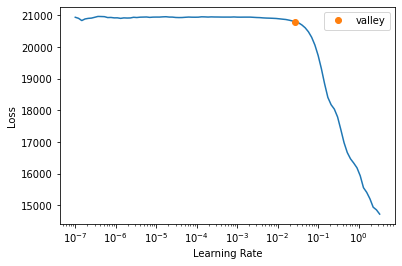

In [45]:
learning_rate = learn.lr_find()


In [46]:
learn.fit_one_cycle(20, learning_rate, wd=0.2)


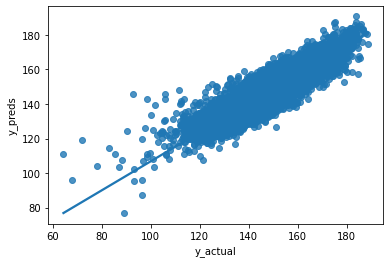

In [47]:
from sklearn import metrics as skm

dl = learn.dls.test_dl(test_df)
y_preds, y_actual = learn.get_preds(dl=dl)

# quick check of mse vs last learn mse
idx = 1
result_mse = skm.mean_squared_error(y_preds, y_actual, squared=False)
result_r2 = skm.r2_score(y_preds, y_actual)

result_mse, result_r2

a = y_preds.numpy().flatten()
b = y_actual.numpy().flatten()
d = pd.DataFrame({'y_preds': a})
d['y_actual'] = b

ax = sns.regplot(data=d, x='y_actual', y='y_preds')


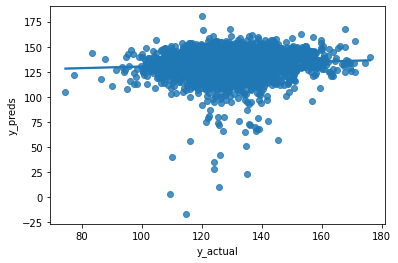

In [49]:
from sklearn import metrics as skm

all_files = glob.glob(os.path.join(processed_dir, "tsf2_infant2*.csv"))

tsf = pd.concat((pd.read_csv(f, converters={'resp': lambda s: [float(
    x.strip(' []')) for x in s.split(',')]}) for f in all_files), ignore_index=True)

tsf = tsf.dropna()

dl = learn.dls.test_dl(tsf)
y_preds, y_actual = learn.get_preds(dl=dl)

# quick check of mse vs last learn mse
idx = 1
result_mse = skm.mean_squared_error(y_preds, y_actual, squared=False)
result_r2 = skm.r2_score(y_preds, y_actual)

result_mse, result_r2

# data = {'y_preds': [y_preds.numpy().flatten()],
#         'y_actual': [y_actual.numpy().flatten()]}


a = y_preds.numpy().flatten()
b = y_actual.numpy().flatten()
d = pd.DataFrame({'y_preds': a})
d['y_actual'] = b

ax = sns.regplot(data=d, x='y_actual', y='y_preds')
# ax.set(ylim=(0, 200))
# ax.set(xlim=(0, 200))


In [13]:
# save the model

PATH = Path('../models/Regression.pkl')
PATH.parent.mkdir(parents=True, exist_ok=True)
learn.export(PATH)

# # delete the variable
# del learn

# load back the model
PATH = Path('../models/Regression.pkl')
model = load_learner(PATH, cpu=False)


In [50]:
idx = int(np.percentile(tsf.index, 66))

data = tsf.copy()
train_df = tsf[:idx].copy()
test_df = tsf[idx:].copy()

train_df


resp__cwt_coefficients__coeff_5__w_2__widths_(2, 5, 10, 20)  \
1                                                         2.914838   
3                                                         2.483438   
5                                                         3.009497   
8                                                         2.783912   
9                                                         2.952905   
...                                                            ...   
11982                                                     2.515119   
11985                                                     2.862549   
11986                                                     2.968456   
11989                                                     2.834718   
11990                                                     3.508275   

       resp__cwt_coefficients__coeff_4__w_5__widths_(2, 5, 10, 20)  \
1                                                        25.778909   
3                                                        22.124671   
5                                                        26.034996   
8                                                        24.509372   
9                                                        25.348216   
...                                                            ...   
11982                                                    22.610637   
11985                                                    25.204454   
11986                                                    25.690211   
11989                                                    25.427412   
11990                                                    26.405002   

       resp__cwt_coefficients__coeff_3__w_2__widths_(2, 5, 10, 20)  \
1                                                        13.755524   
3                                                        11.943030   
5                                                        13.808059   
8                                                        13.303028   
9                                                        13.440732   
...                                                            ...   
11982                                                    12.017563   
11985                                                    13.898491   
11986                                                    13.666014   
11989                                                    13.551959   
11990                                                    14.028539   

       resp__cwt_coefficients__coeff_4__w_2__widths_(2, 5, 10, 20)  \
1                                                         7.469968   
3                                                         6.454175   
5                                                         7.536744   
8                                                         7.141949   
9                                                         7.359039   
...                                                            ...   
11982                                                     6.508950   
11985                                                     7.573300   
11986                                                     7.456935   
11989                                                     7.355839   
11990                                                     7.934577   

       resp__cwt_coefficients__coeff_3__w_5__widths_(2, 5, 10, 20)  \
1                                                        22.087445   
3                                                        19.081338   
5                                                        22.463989   
8                                                        20.992739   
9                                                        21.911666   
...                                                            ...   
11982                                                    19.631049   
11985                                                    21.931926   
11986        

RMSE :  9.145382
R2 :  0.130268


<AxesSubplot:xlabel='y_actual', ylabel='y_pred'>

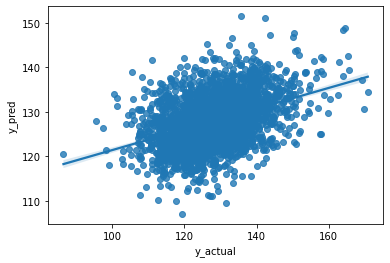

In [51]:
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
  
# Load the data
dataset = train_df
# # drop = ['hrs', 'sig_min', 'sig_mean', 'sig_max' ]
y_col = ['hr']
X, y =  dataset.drop(columns=y_col), dataset[y_col]

# X, y = dfx[:-1], dfy['hrs']
  
# Splitting
train_X, test_X, train_y, test_y = train_test_split(X, y,
                      test_size = 0.3, random_state = 123)

# set objective
# obj = 'reg:linear' # deprecated, change to squarederror
obj = 'reg:squarederror'
# obj = 'reg:pseudohubererror'
  
# Instantiation
xgb_r = xg.XGBRegressor(objective = obj,
                  n_estimators = 1000, seed = 123)
  
# Fitting the model
xgb_r.fit(train_X, train_y)
  
# Predict the model
pred = xgb_r.predict(test_X)
  
# RMSE Computation
rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))

# r2square compution
r2 = r2_score(test_y, pred)
print("R2 : % f" %(r2))

# plot prediction vs actual
dft = pd.DataFrame({'y_actual': test_y.values.flatten(), 'y_pred': pred})
sns.regplot(data=dft, x='y_actual', y='y_pred')


RMSE :  9.145382
R2 : -0.033966


<AxesSubplot:xlabel='y_actual', ylabel='y_pred'>

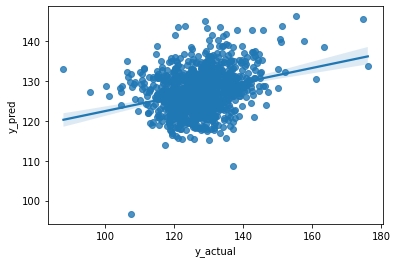

In [52]:

# Load the data
dataset = test_df

y_col = ['hr']
blind_X, blind_y = dataset.drop(columns=y_col), dataset[y_col]

# Predict the model
blind_pred = xgb_r.predict(blind_X)

# RMSE Computation
blind_rmse = np.sqrt(MSE(blind_y, blind_pred))
print("RMSE : % f" % (rmse))

# r2square compution
blind_r2 = r2_score(blind_y, blind_pred)
print("R2 : % f" % (blind_r2))


dft = pd.DataFrame(
    {'y_actual': blind_y.values.flatten(), 'y_pred': blind_pred})

sns.regplot(data=dft, x='y_actual', y='y_pred')
